In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InterferogramOntoAlpha

In [4]:
%cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY\s0405_16 Faraday"

/Users/jdhare/Google Drive/MAGPIE/data/2016/s0405_16 C RECONNECTION FARADAY/s0405_16 Faraday


In [5]:
R0fn="s0405_16_142841_c1.png"
R1fn="s0405_16_142841_c2.png"
B0fn="s0405_16_143858_c1.png"
B1fn="s0405_16_143858_c2.png"
S0fn="s0405_16_145359_c1.png"
S1fn="s0405_16_145359_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-3)

In [4]:
s.register()
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:110: RuntimeWarning: invalid value encountered in true_divide
  self.N0=self.S0/self.B0
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:111: RuntimeWarning: invalid value encountered in true_divide
  self.N1=self.ST/self.BT


<IPython.core.display.Javascript object>


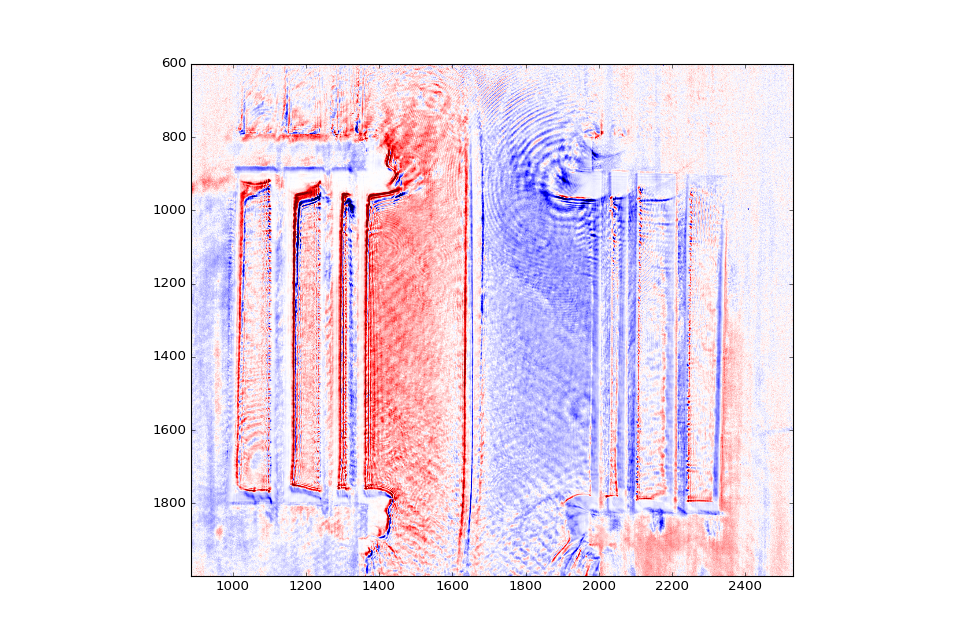

In [5]:
s.plot_data_px(clim=[-2,2])

In [6]:
s.scale=57
s.set_origin((1360,1670), extent=[-8,8,-7,7])

<IPython.core.display.Javascript object>


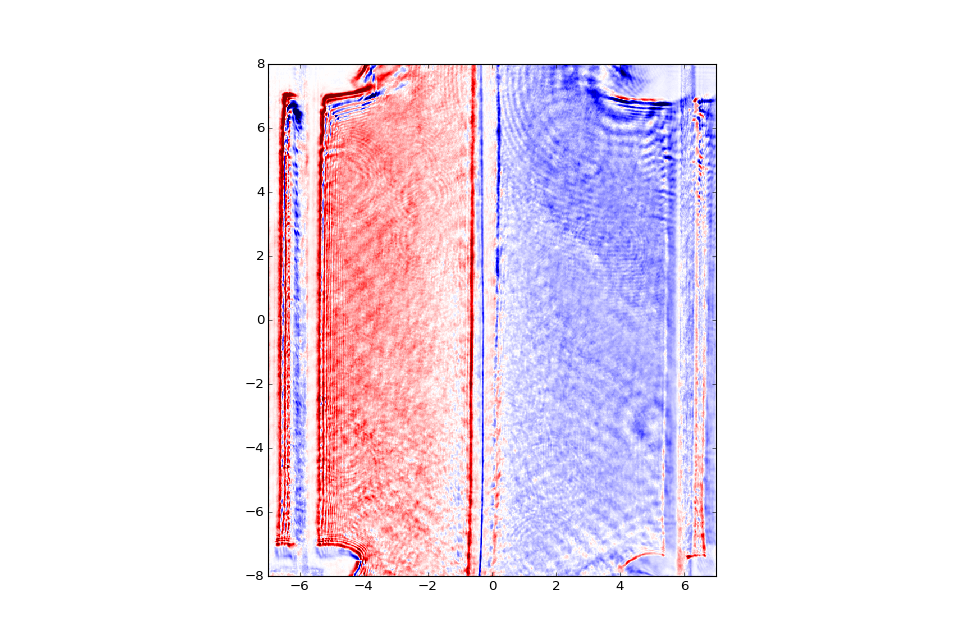

In [7]:
s.plot_data_mm(clim=[-2,2])

# Bring in Interferometry

In [8]:
cd ".."

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY


In [ ]:
#I0="s0405_16 IR side on interferometry (4).JPG"
#I1="s0405_16 IR side on interferometry (3).JPG"
#i=InterferogramOntoAlpha(s, I0, I1)
#i.register()

In [ ]:
#i.plot_overlay_px(clim=[-2,2])

In [9]:
I0="s0405_16 IR side on interferometry (4).JPG"
ne="s0405_16 side on neL.txt"
b=FaradayMap2(s, I0, ne)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [10]:
b.register()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


AttributeError: 'FaradayMap2' object has no attribute 'I1T'

In [13]:
b.data=5.99e18*b.pm.data/b.IT

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


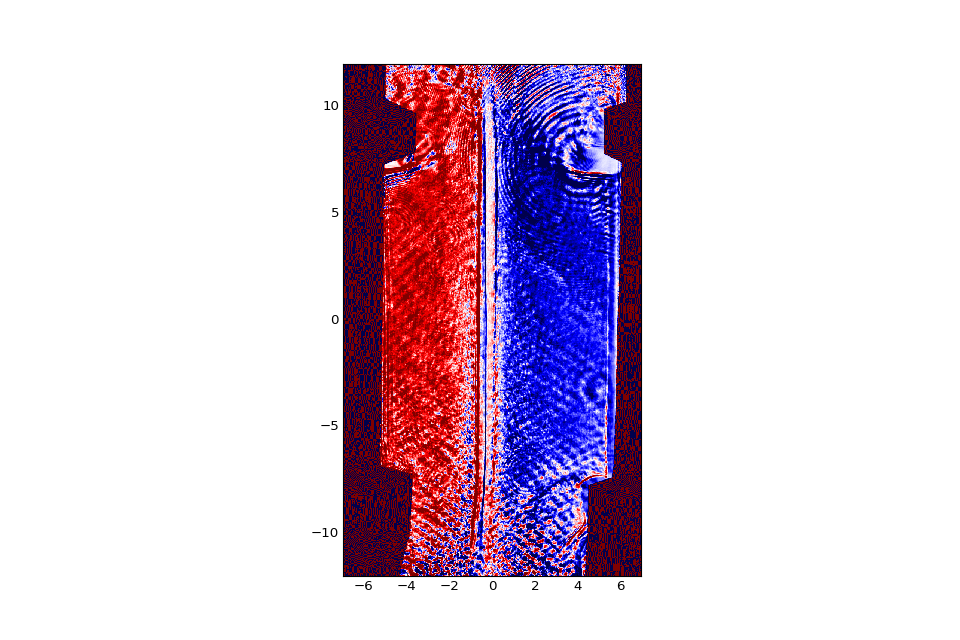

In [27]:
b.scale=57
b.set_origin((1360,1670), extent=[-12,12,-7,7])
b.plot_data_mm(clim=[-3,3])

<IPython.core.display.Javascript object>


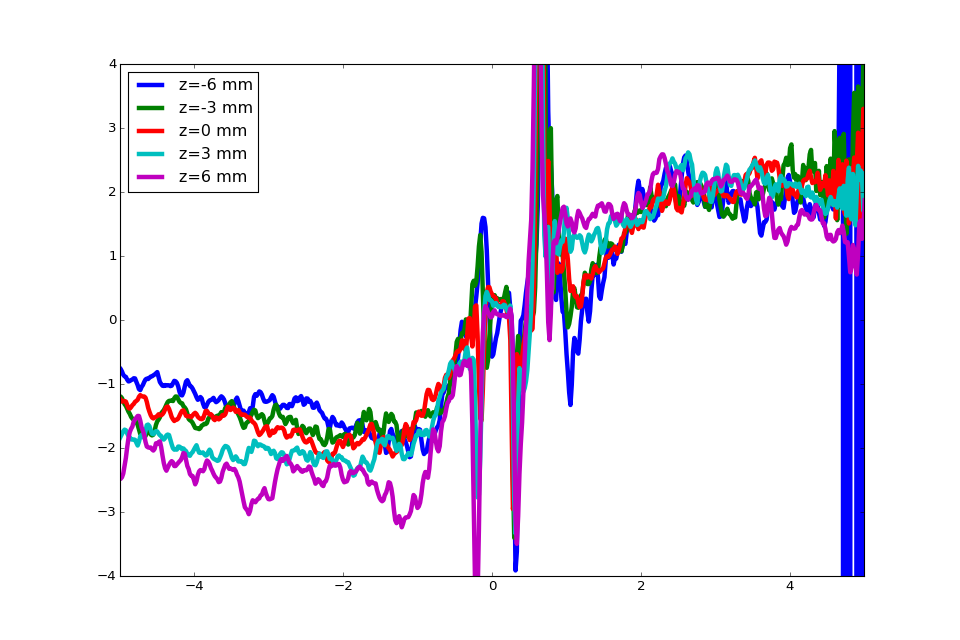

(798, 114) (798, 684)
(627, 114) (627, 684)
(456, 114) (456, 684)
(285, 114) (285, 684)
(114, 114) (114, 684)


In [26]:
fig,ax=plt.subplots(figsize=(12,8))

for z in [-6,-3,0,3,6]:
    b.create_lineout(start=(z,-5), end=(z,5), lineout_width=b.scale*2)
    b.plot_lineout(ax=ax, label='z='+str(z)+' mm')

ax.set_ylim([-4,4])
ax.set_xlim([-5,5])
ax.legend(loc=2)

(456, 171) (456, 627)
 - Adding parameter for hint "B0"
 - Adding parameter for hint "x0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "x0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


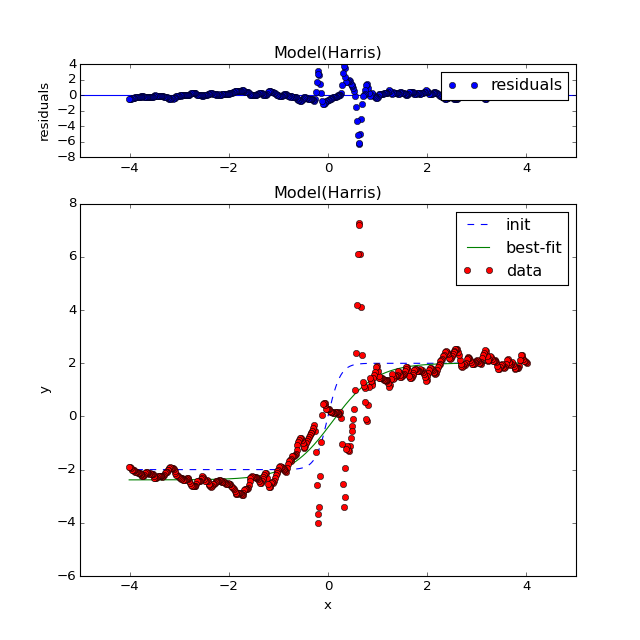

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 457
    # variables        = 4
    chi-square         = 290.465
    reduced chi-square = 0.641
[[Variables]]
    B0:   2.19717585 +/- 0.051789 (2.36%) (init= 2)
    x0:   0.09147220 +/- 0.048188 (52.68%) (init= 0)
    L:    0.88652383 +/- 0.084662 (9.55%) (init= 0.25)
    C:   -0.18862801 +/- 0.045826 (24.29%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, C)                     =  0.576 
    C(B0, L)                     =  0.573 



In [40]:
from lmfit import Model

def Harris(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C
hm=Model(Harris, independent_vars='x')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('x0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)

y=4

b.create_lineout(start=(y,-4), end=(y,4), lineout_width=b.scale*2)

res=hm.fit(b.lo, x=b.mm)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(8,8)})
print(res.fit_report())

In [ ]:
l=0.2
fig, ax=plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True)
ax[0,0].imshow(s.R0, cmap='seismic', clim=[-l,l])
ax[0,1].imshow(-s.R1, cmap='seismic', clim=[-l,l])
ax[1,0].imshow(s.R0-s.result['timg'], cmap='seismic', clim=[-l,l])
ax[1,1].imshow(-s.result['timg'], cmap='seismic', clim=[-l,l])

# Study Interferometry

In [8]:
cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY\"

/Users/jdhare/Google Drive/MAGPIE/data/2016/s0405_16 C RECONNECTION FARADAY


In [14]:
ne="s0405_16 side on neL.txt"
scale=1463/16.0
s=NeLMap2(ne, scale=scale, rot_angle=1.5)

<IPython.core.display.Javascript object>


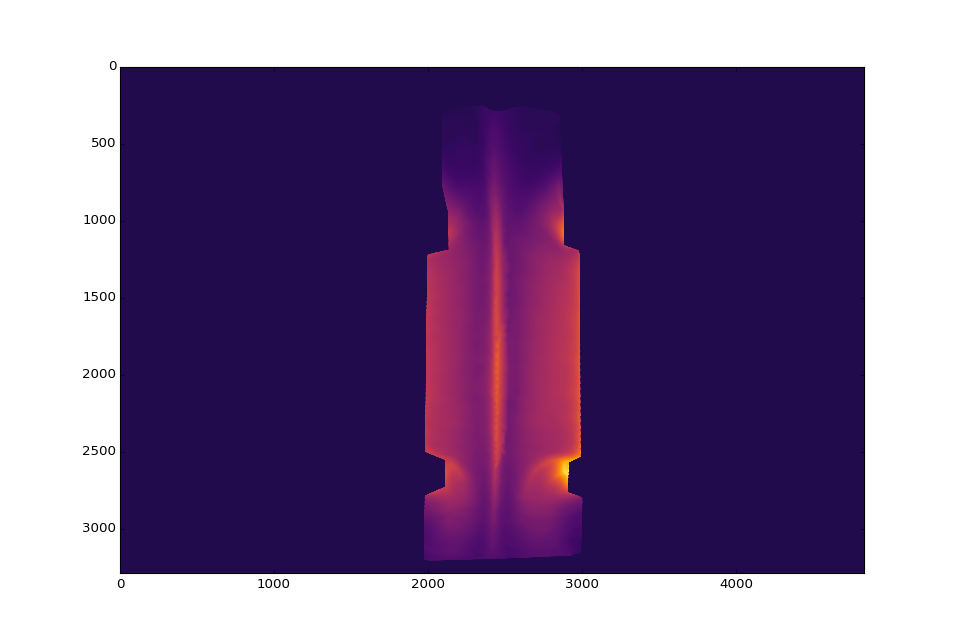

In [13]:
s.plot_data_px()

In [48]:
s.set_origin(origin=(1900,2450), extent=[-18,18,-5,5])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


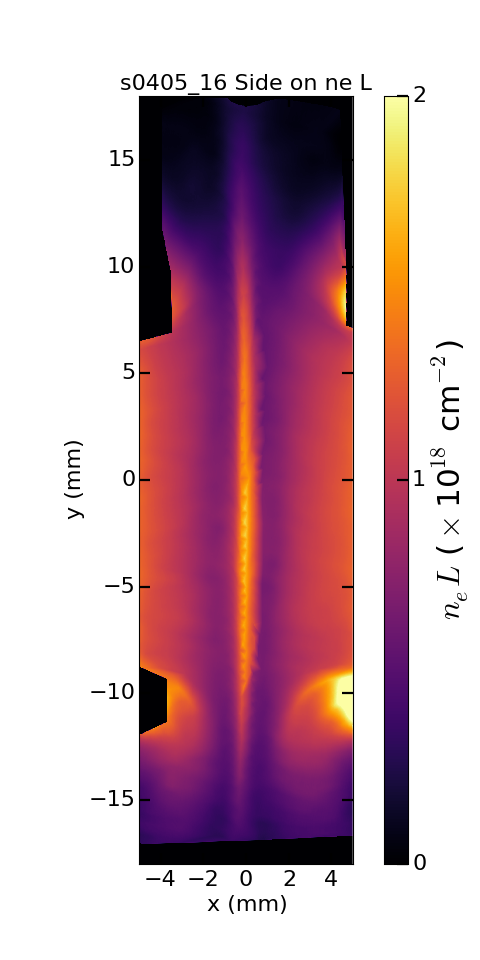

In [87]:
fig, ax3 =plt.subplots(figsize=(6,12))
im=s.plot_data_mm(ax=ax3,multiply_by=1e-18, clim=[0,2])

ax3.tick_params(labelsize=20, pad=5, length=10, width=2)
ax3.set_xlabel('x (mm)', fontsize=20)
ax3.set_ylabel('y (mm)', fontsize=20)


cbar_ax = fig.add_axes([0.8, 0.10, 0.05, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=20, pad=5, length=10, width=2)
fig.colorbar(im, cax=cbar_ax, ticks=[0.0,1,2,3.0])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

ax3.set_title('s0405_16 Side on ne L', fontsize=20)

In [88]:
fig.savefig('s0405_16 side on neL.png')

In [94]:
below=s.data[1190-6*scale:1190, 2140:2860]
centre=s.data[1190:2530, 2140:2860]#s.data[1860-3*scale:1860+3*scale, 2140:2860]#
above=s.data[2530:2530+6*scale, 2140:2860]

b_s=np.sum(below,axis=0)
c_s=np.sum(centre,axis=0)
a_s=np.sum(above,axis=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [31]:
mm=np.linspace(-306/scale, 306/scale, 306*2)

In [81]:
(1190+2530)/2

1860.0

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


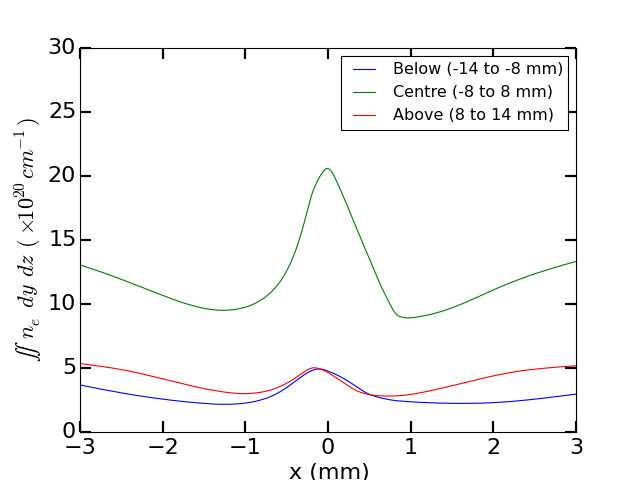

In [96]:
fig,ax=plt.subplots()
ax.plot(mm,b_s[0:306*2]/1e20, label='Below (-14 to -8 mm)')
ax.plot(mm,c_s[0:306*2]/1e20, label='Centre (-8 to 8 mm)')
ax.plot(mm,a_s[0:306*2]/1e20, label='Above (8 to 14 mm)')

ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.tick_params(labelsize=20, pad=5, length=10, width=2)

ax.set_ylim([0,30])
ax.set_ylabel(r'$\iint\, n_e\, dy\, dz\, (\times 10^{20} cm^{-1})$', fontsize=20)

ax.legend()

In [97]:
fig.savefig('s0405_16 density in unequal regions.png')